In [1]:
#-*- coding:utf-8 -*-
import csv
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt
%matplotlib inline
# 심혈관 질환 데이터셋 불러오기
"""
    데이터셋 출처
    https://www.kaggle.com/sulianova/cardiovascular-disease-dataset
"""
df = pd.read_csv('cardio_train2.csv')

# index를 제거하기 위한 작업
# 기존 DataFrame에는 인덱싱이 되어있기 때문에 그 부분을 제거하기 위한 작업
blankIndex=[''] * len(df)
# index값에 대입하여 인덱싱된 값을 제거
df.index=blankIndex

# 첫 5행을 출력
display(df.head())

# DataFrame의 형태 출력
display(df.describe())
df.info()

,gender,ages,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
,1,29,175,59.0,120,80,1,1,0,0,1,0
,1,29,159,59.0,120,80,1,1,0,0,1,0
,2,29,175,92.0,100,60,1,1,0,0,1,0
,1,30,160,59.0,110,70,1,1,0,0,1,0
,1,39,173,73.0,160,100,1,1,0,0,0,1


,gender,ages,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,65861.000000,65861.000000,65861.000000,65861.000000,65861.000000,65861.000000,65861.000000,65861.000000,65861.000000,65861.000000,65861.000000,65861.000000
mean,1.350025,52.830370,164.433033,74.063580,125.963119,81.206541,1.359424,1.223714,0.087563,0.052808,0.803723,0.490806
std,0.476981,6.760877,8.155725,14.114574,13.998594,8.545844,0.676104,0.570637,0.282661,0.223652,0.397184,0.499919
min,1.000000,29.000000,55.000000,11.000000,100.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,48.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,53.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,2.000000,58.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,2.000000,64.000000,250.000000,200.000000,160.000000,120.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
Index: 65861 entries,  to 
Data columns (total 12 columns):
gender         65861 non-null int64
ages           65861 non-null int64
height         65861 non-null int64
weight         65861 non-null float64
ap_hi          65861 non-null int64
ap_lo          65861 non-null int64
cholesterol    65861 non-null int64
gluc           65861 non-null int64
smoke          65861 non-null int64
alco           65861 non-null int64
active         65861 non-null int64
cardio         65861 non-null int64
dtypes: float64(1), int64(11)
memory usage: 6.5+ MB


In [2]:
# 데이터 확인
print("\n* Data Shape : ", df.shape)
print("\n* Class : ", set(df['cardio'].values))
Y_NAME = "class"

"""
    target이 되는 클래스 : 0, 1
    전처리 후 : normal, abnormal
"""


* Data Shape :  (65861, 12)

* Class :  {0, 1}


'\n    target이 되는 클래스 : 0, 1\n    전처리 후 : normal, abnormal\n'

In [3]:
df.rename(index=str, columns={"cardio": Y_NAME}, inplace=True)
df[Y_NAME].replace(0, "normal", inplace=True)
df[Y_NAME].replace(1, "abnormal", inplace=True)

labels = set(df[Y_NAME].values)
print("\n* Class : ",labels)
# 각 컬럼별 NULL값 찾기
print("\nNULL값 확인")
print(df[df.isnull().any(1)])
print("\n 데이터 5줄 출력")
df.head()


* Class :  {'normal', 'abnormal'}

NULL값 확인
Empty DataFrame
Columns: [gender, ages, height, weight, ap_hi, ap_lo, cholesterol, gluc, smoke, alco, active, class]
Index: []

 데이터 5줄 출력


,gender,ages,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,class
,1,29,175,59.0,120,80,1,1,0,0,1,normal
,1,29,159,59.0,120,80,1,1,0,0,1,normal
,2,29,175,92.0,100,60,1,1,0,0,1,normal
,1,30,160,59.0,110,70,1,1,0,0,1,normal
,1,39,173,73.0,160,100,1,1,0,0,0,abnormal


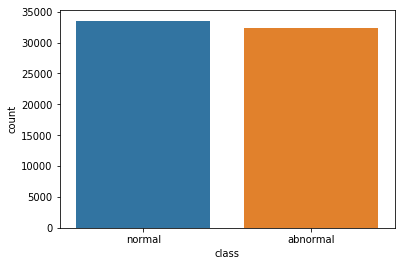

In [4]:
# Data balance확인
sns.countplot(x=df[Y_NAME], data=df)

# 벨런스 편---안

In [5]:
# 데이터 전처리 및 비율 확인
labels_count = dict(normal=0, abnormal=0)
total = 0

print(*np.unique(df[Y_NAME],return_counts=True))
for label in df[Y_NAME].values:
    labels_count[label] += 1
for count in labels_count.values():
    total += count
for label in labels_count.items():
    print("{0: <15} 개수:{1}개\t데이터비중:{2:.3f}".format(*label, label[1]/total))
del labels_count

['abnormal' 'normal'] [32325 33536]
normal          개수:33536개	데이터비중:0.509
abnormal        개수:32325개	데이터비중:0.491


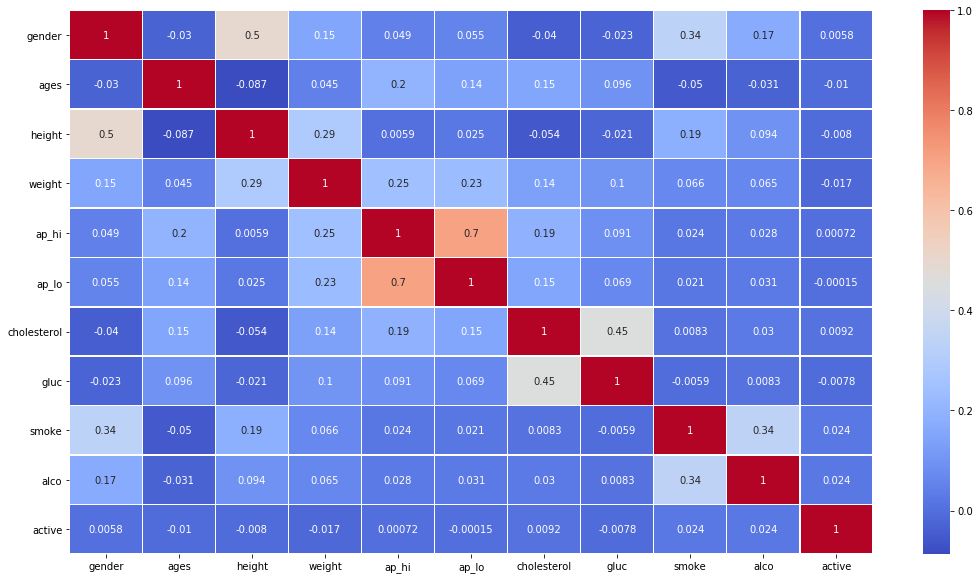

In [6]:
# Feature Correlation 확인
plt.figure(figsize=(18, 10))
sns.heatmap(df.corr(),annot=True,linewidth = 0.5, cmap='coolwarm')

Feature Selection
-------------

1. Univariate Selection
2. Recursive Feature Elimination
3. Principal Component Analysis
4. Feature Importance

In [19]:
x = df[['ages','gender','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active']].values
y = df['class'].values

x_train, x_test, y_train, y_test = train_test_split(x, y)

In [21]:
# Univariate Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(x, y)
# summarize scores
np.set_printoptions(precision=3)
print("{}".format(fit.scores_))
features = fit.transform(x)

[3.124e+03 1.332e-03 7.978e+00 4.986e+03 1.912e+04 6.353e+03 1.066e+03
 1.334e+02 2.260e+01 8.914e+00 1.862e+01]


In [27]:
# Recursive Feature Elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# 'ages','gender','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active'

# feature extraction
model = LogisticRegression()
rfe = RFE(model, 5)
fit = rfe.fit(x, y)
print("Num Features: {}".format(fit.n_features_))
print("Selected Features: {}".format(fit.support_))
print("Feature Ranking: {}".format(fit.ranking_))

Num Features: 5
Selected Features: [False False False False False False  True  True  True  True  True]
Feature Ranking: [3 7 6 5 2 4 1 1 1 1 1]


In [29]:
# Principal Component Analysis
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
fit = pca.fit(x)
# summarize components
print("Explained Variance: {}".format(fit.explained_variance_ratio_))
print(fit.components_)

Explained Variance: [0.485 0.287 0.101]
[[ 7.891e-02  3.897e-03  9.467e-02  5.861e-01  7.114e-01  3.676e-01
   8.575e-03  4.052e-03  9.695e-04  7.740e-04 -2.013e-04]
 [-8.229e-02  6.375e-03  2.522e-01  7.673e-01 -5.278e-01 -2.494e-01
  -1.951e-03  6.355e-04  1.546e-03  8.591e-04 -4.674e-04]
 [ 2.619e-01 -2.700e-02 -9.242e-01  2.547e-01 -7.727e-02 -7.473e-02
   9.971e-03  5.432e-03 -6.226e-03 -2.201e-03 -1.262e-04]]


In [30]:
# Feature Importance

from sklearn.ensemble import ExtraTreesClassifier
# feature extraction
model = ExtraTreesClassifier()
model.fit(x, y)
print(model.feature_importances_)

[0.156 0.011 0.236 0.261 0.184 0.075 0.045 0.014 0.006 0.006 0.007]
